# <span style='color:pink'> pakiety matematyczne - projekt  </span>
## <span style='color:pink'> Funkcja DFT (tydzień 1)  </span>

In [21]:
using WAV
using Plots
using FFTW
using PyCall
using OffsetArrays

In [60]:
note_full = wavread("1000Hz.wav")

([0.10046566730328409; 0.2831737140624182; … ; -0.26611581636855797; -0.0871069535144512], 48000.0f0, 0x0018, WAVChunk[WAVChunk(Symbol("fmt "), UInt8[0x10, 0x00, 0x00, 0x00, 0x01, 0x00, 0x01, 0x00, 0x80, 0xbb, 0x00, 0x00, 0x80, 0x32, 0x02, 0x00, 0x03, 0x00, 0x18, 0x00]), WAVChunk(Symbol("cue "), UInt8[0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00  …  0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00])])

In [62]:
note = note_full[1][1:30000]

30000-element Array{Float64,1}:
  0.10046566730328409
  0.2831737140624182
  0.46279078278431685
  0.6320141115205421
  0.7925001135468618
  0.9377725050178176
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  ⋮
 -1.0000001192093038
 -1.0000001192093038
 -1.0000001192093038
 -1.0000001192093038
 -1.0000001192093038
 -1.0000001192093038
 -0.9257424981287119
 -0.7783143256085308
 -0.6176166078587303
 -0.4463820989587425
 -0.2675366720600929
 -0.08408821631529526

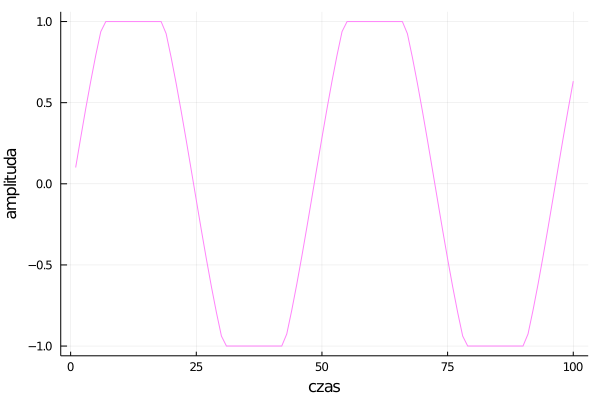

In [64]:
plot(note[1:100], linecolor = :orchid1, label =:none, xlabel = "czas", ylabel= "amplituda")

### <span style="text-decoration:underline">Funkcja zwracająca macierz dft</span>

In [24]:
function dft(signal)
    N = length(signal)
    zeta = exp(-2π *  im /N)
    spec_freq = [ sum(signal[n+1] * zeta^(n * f) for n in 0:(N-1) ) for f in 0:(N-1)]
    return spec_freq
end

dft (generic function with 1 method)

In [65]:
@time dft1 = dft(note[1:10000])

 10.350494 seconds (4 allocations: 234.531 KiB)


10000-element Array{Complex{Float64},1}:
 12.776639673308557 + 0.0im
 13.210932037366897 - 0.0322069452972614im
 13.212533411737928 - 0.06455758539512135im
 13.213677175804063 - 0.09616696080805007im
 13.216407248044586 - 0.12870395026843837im
 13.218846571016293 - 0.16121969758093im
 13.222420482211191 - 0.1931286291483583im
 13.226072388396076 - 0.2254532997582614im
 13.231673165042498 - 0.25778768264541047im
 13.236450019882035 - 0.29027099646332455im
 13.242477492638368 - 0.32300055499587926im
  13.24930865976569 - 0.35491321871047316im
 13.256478642684188 - 0.38759736115037774im
                    ⋮
 13.256478630567528 + 0.3875973598641849im
  13.24930864765374 + 0.35491321752884575im
 13.242477480531376 + 0.32300055391717764im
 13.236450007779158 + 0.290270995488482im
 13.231673152942001 + 0.25778768177298117im
 13.226072376299118 + 0.22545329898736188im
  13.22242047011532 + 0.1931286284780943im
 13.218846558921754 + 0.16121969700847766im
 13.216407235950154 + 0.128703949790906

In [66]:
@time fft1 = fft(note[1:10000])

  0.000486 seconds (37 allocations: 393.219 KiB)


10000-element Array{Complex{Float64},1}:
 12.776639673309294 + 0.0im
 13.210932037368142 - 0.03220694529727171im
  13.21253341174025 - 0.06455758539518831im
 13.213677175807591 - 0.09616696080815533im
 13.216407248049366 - 0.12870395026860518im
 13.218846571022324 - 0.16121969758125082im
 13.222420482218498 - 0.19312862914873896im
 13.226072388404587 - 0.22545329975881606im
 13.231673165052225 - 0.25778768264609897im
 13.236450019892974 - 0.29027099646417337im
 13.242477492650528 - 0.32300055499695357im
 13.249308659779006 - 0.35491321871178383im
 13.256478642698706 - 0.3875973611519036im
                    ⋮
 13.256478642698745 + 0.38759736115186816im
 13.249308659779008 + 0.35491321871178294im
 13.242477492650526 + 0.32300055499694225im
  13.23645001989301 + 0.2902709964642196im
  13.23167316505226 + 0.25778768264611807im
 13.226072388404585 + 0.2254532997588048im
 13.222420482218501 + 0.19312862914874063im
 13.218846571022333 + 0.16121969758124444im
 13.216407248049372 + 0.12870395

In [67]:
isapprox(dft1, fft1)

true

### <span style="text-decoration:underline">Zoptymalizowana funkcja DFT - wykorzystanie OffsetArray</span>

In [68]:
function dft_opt(signal)
    N = length(signal)
    zeta_powers = OffsetArray([exp( -2π *  im * n / N) for n in 0:(N-1) ], 0:(N-1))
    [  sum( signal[n + 1] * zeta_powers[(n * f) % N] for n in 0:(N-1)   ) for f in 0:(N-1) ]
end

dft_opt (generic function with 1 method)

In [74]:
@time fft1 = fft(note)

  0.002599 seconds (35 allocations: 940.016 KiB)


30000-element Array{Complex{Float64},1}:
     -1.3016487719593854 + 0.0im
  0.00019357913919917165 + 2.697937149512219e-5im
  -0.0003228901875666373 + 0.0006263454541739703im
   0.0003314815059138682 - 0.0006909245029498923im
  -0.0004927276086883115 + 0.0003463223584609167im
   0.0013557048970852738 + 0.00045613255167597155im
   0.0003830919788527029 - 5.5690116694314995e-5im
  0.00021727694739017962 + 2.4635231487025604e-6im
 -0.00036738621282371756 + 0.00037920558191690206im
 -0.00020517096273678067 + 0.0005853981121532643im
   0.0003549646409666753 + 3.6321821111839146e-5im
  0.00018585555060895227 + 0.000660992297267317im
   0.0004660256539715914 - 0.0001219763401345144im
                         ⋮
   0.0004660256539715918 + 0.0001219763401345192im
  0.00018585555059155148 - 0.0006609922972779337im
   0.0003549646409666754 - 3.6321821111839946e-5im
 -0.00020517096270175508 - 0.000585398112170352im
   -0.000367386212823715 - 0.00037920558191690233im
  0.00021727694742029713 - 2.463

In [75]:
@time dft2 = dft_opt(note)

  5.612763 seconds (4 allocations: 937.656 KiB)


30000-element Array{Complex{Float64},1}:
     -1.3016487719608258 + 0.0im
   0.0001935791390738767 + 2.6979371579189066e-5im
  -0.0003228901876384943 + 0.0006263454541812044im
   0.0003314815059755616 - 0.000690924502895017im
  -0.0004927276087451221 + 0.0003463223584371232im
   0.0013557048972591967 + 0.0004561325517753865im
   0.0003830919787890519 - 5.56901166640599e-5im
  0.00021727694740093784 + 2.4635231240593904e-6im
 -0.00036738621284775064 + 0.0003792055818546234im
 -0.00020517096277519742 + 0.0005853981121573792im
  0.00035496464095509384 + 3.6321821166260146e-5im
   0.0001858555505635795 + 0.0006609922972607319im
  0.00046602565386942574 - 0.00012197634016163826im
                         ⋮
   0.0004660256539440327 + 0.0001219763400994661im
  0.00018585555057068492 - 0.0006609922972424085im
   0.0003549646408449597 - 3.632182107257792e-5im
 -0.00020517096272901214 - 0.0005853981121087761im
 -0.00036738621282998707 - 0.0003792055819254658im
   0.0002172769473654107 - 2.463523

In [76]:
isapprox(dft2, fft1)

true

In [78]:
fft_note = fft(note)

30000-element Array{Complex{Float64},1}:
     -1.3016487719593854 + 0.0im
  0.00019357913919917165 + 2.697937149512219e-5im
  -0.0003228901875666373 + 0.0006263454541739703im
   0.0003314815059138682 - 0.0006909245029498923im
  -0.0004927276086883115 + 0.0003463223584609167im
   0.0013557048970852738 + 0.00045613255167597155im
   0.0003830919788527029 - 5.5690116694314995e-5im
  0.00021727694739017962 + 2.4635231487025604e-6im
 -0.00036738621282371756 + 0.00037920558191690206im
 -0.00020517096273678067 + 0.0005853981121532643im
   0.0003549646409666753 + 3.6321821111839146e-5im
  0.00018585555060895227 + 0.000660992297267317im
   0.0004660256539715914 - 0.0001219763401345144im
                         ⋮
   0.0004660256539715918 + 0.0001219763401345192im
  0.00018585555059155148 - 0.0006609922972779337im
   0.0003549646409666754 - 3.6321821111839946e-5im
 -0.00020517096270175508 - 0.000585398112170352im
   -0.000367386212823715 - 0.00037920558191690233im
  0.00021727694742029713 - 2.463

In [80]:
dft_note = dft_opt(note)

30000-element Array{Complex{Float64},1}:
     -1.3016487719608258 + 0.0im
   0.0001935791390738767 + 2.6979371579189066e-5im
  -0.0003228901876384943 + 0.0006263454541812044im
   0.0003314815059755616 - 0.000690924502895017im
  -0.0004927276087451221 + 0.0003463223584371232im
   0.0013557048972591967 + 0.0004561325517753865im
   0.0003830919787890519 - 5.56901166640599e-5im
  0.00021727694740093784 + 2.4635231240593904e-6im
 -0.00036738621284775064 + 0.0003792055818546234im
 -0.00020517096277519742 + 0.0005853981121573792im
  0.00035496464095509384 + 3.6321821166260146e-5im
   0.0001858555505635795 + 0.0006609922972607319im
  0.00046602565386942574 - 0.00012197634016163826im
                         ⋮
   0.0004660256539440327 + 0.0001219763400994661im
  0.00018585555057068492 - 0.0006609922972424085im
   0.0003549646408449597 - 3.632182107257792e-5im
 -0.00020517096272901214 - 0.0005853981121087761im
 -0.00036738621282998707 - 0.0003792055819254658im
   0.0002172769473654107 - 2.463523

In [81]:
fft_note[10001]

-0.0178883097038601 + 0.007309270608098318im

In [82]:
dft_note[10000]

-0.0007244655424403709 + 0.000588934719118292im

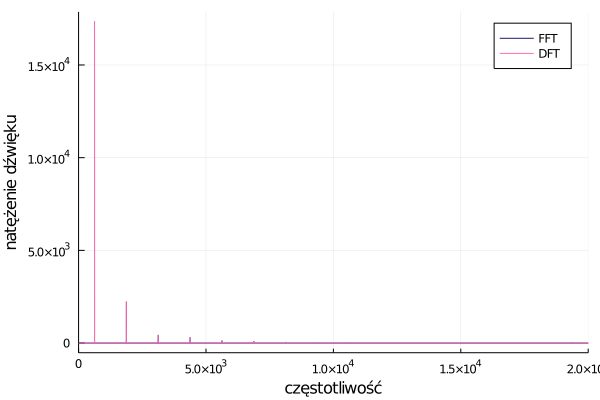

In [83]:
plot(abs.(fft_note), x_lims = (0, 20000), label = "FFT", xlabel = "częstotliwość", ylabel= "natężenie dźwięku", linecolor =:midnightblue)
plot!(abs.(dft_note), x_lims = (0, 20000), label = "DFT", linecolor =:hotpink1)

In [58]:
length(note[1])

480000